In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Exercise 1: Implement Simple Linear Regression

In [3]:
computers = pd.read_csv('data/computers.csv')

In [4]:
computers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Units    14 non-null     int64
 1   Minutes  14 non-null     int64
dtypes: int64(2)
memory usage: 356.0 bytes


In [5]:
computers

,Units,Minutes
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74
5,5,87
6,6,96
7,6,97
8,7,109
9,8,119


In [23]:
minutes_model0 = computers['Minutes'].mean()
minutes_modell = 10 + 12*computers['Units']
minutes_model2 = 6 + 18*computers['Units']


In [24]:
computers['min_model0'] = minutes_model0
computers['min_model1'] = minutes_modell
computers['min_model2'] = minutes_model2
computers

,Units,Minutes,min_model0,min_model1,min_model2
0,1,23,97.214286,22,24
1,2,29,97.214286,34,42
2,3,49,97.214286,46,60
3,4,64,97.214286,58,78
4,4,74,97.214286,58,78
5,5,87,97.214286,70,96
6,6,96,97.214286,82,114
7,6,97,97.214286,82,114
8,7,109,97.214286,94,132
9,8,119,97.214286,106,150


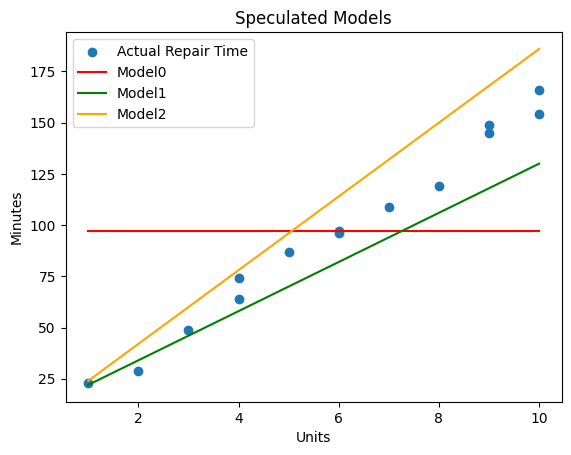

In [39]:
fig,ax = plt.subplots()
ax.scatter(x="Units",y="Minutes",data=computers,label='Actual Repair Time')
ax.plot(computers['Units'],computers['min_model0'],color='red',label='Model0')
ax.plot(computers['Units'],computers['min_model1'],color='green',label='Model1')
ax.plot(computers['Units'],computers['min_model2'],color='orange',label='Model2')
ax.set_ylabel("Minutes")
ax.set_xlabel("Units")
ax.set_title("Speculated Models")
ax.legend()

In [30]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [29]:
X = computers[['Units']]

In [28]:
y = computers['Minutes']

In [26]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
print("Intercept:",model.intercept_)
print("Coefficient:",model.coef_)

Intercept: 4.161654135338296
Coefficient: [15.50877193]


In [36]:
computers['min_model3'] = minutes_model3 = model.predict(X)

In [38]:
Rsq = model.score(computers[['Units']],y)
Rsq

0.9874371980620736